In [2]:
## Trail Doc for Data Exploration:
# Install geopandas (only required once in Jupyter Notebook)
%pip install geopandas

# Import necessary library
import geopandas as gpd

# Path to your GeoJSON file
file_path = "C:/Users/25077/Final/data/2020_PA_stops_buffer3_UTCI.geojson"

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(file_path)

# Display the first few rows of the GeoDataFrame
print(gdf.head())

# Check the coordinate reference system (CRS)
print(gdf.crs)


Note: you may need to restart the kernel to use updated packages.
  stop_id                  stop_name        route_ids     8_mean     9_mean  \
0      69  Front St & Market St Loop  [17, 33, 48, 5]  32.921080  35.331401   
1     359         Market St & 6th St         [17, 33]  32.915207  35.338738   
2     428       2nd St Station - MFL            [MFL]  32.882592  35.296339   
3     638    5th St & Market St - FS         [38, 44]  32.816049  35.166788   
4     735         7th St & Market St             [47]  32.586969  34.947970   

     10_mean    11_mean    12_mean    13_mean    14_mean    15_mean  \
0  36.593409  37.493377  37.913334  37.893180  37.814597  37.627905   
1  36.595370  37.492715  37.932264  37.907860  37.815116  37.605102   
2  36.539032  37.417567  37.840649  37.825040  37.782353  37.626118   
3  34.362318  32.769761  37.407488  37.704560  37.758148  37.709751   
4  34.387193  33.483910  33.636118  35.379926  36.952045  37.521443   

     16_mean    17_mean    18_me

C:\Users\25077\AppData\Local\Temp\ipykernel_40800\2252602194.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geometry'] = gdf.geometry.centroid
C:\Users\25077\AppData\Local\Temp\ipykernel_40800\2252602194.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


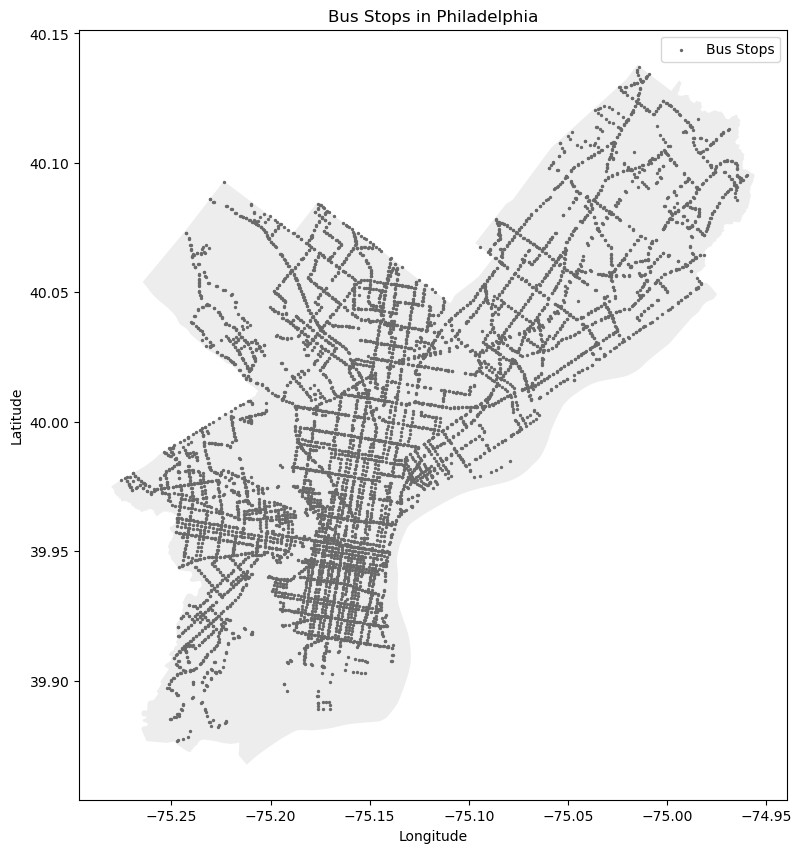

In [4]:
import matplotlib.pyplot as plt

# Convert MULTIPOLYGON geometries to their centroids
gdf['geometry'] = gdf.geometry.centroid

# Reproject to WGS 84 (EPSG:4326)
gdf = gdf.to_crs(epsg=4326)

# Load the city limits GeoJSON
city_limits_gdf = gpd.read_file("C:/Users/25077/Final/data/City_Limits.geojson")
city_limits_gdf = city_limits_gdf.to_crs(epsg=4326)  # Reproject if needed

# Plot both layers
fig, ax = plt.subplots(figsize=(10, 10))
city_limits_gdf.plot(ax=ax, color='lightgray', alpha=0.4, label="City Limits")
gdf.plot(ax=ax, markersize=2, color='dimgrey', label="Bus Stops")

# Add title and legend
plt.title("Bus Stops in Philadelphia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [5]:
gdf.head()

,stop_id,stop_name,route_ids,8_mean,9_mean,10_mean,11_mean,12_mean,13_mean,14_mean,15_mean,16_mean,17_mean,18_mean,19_mean,geometry
0,69,Front St & Market St Loop,"[17, 33, 48, 5]",32.921080,35.331401,36.593409,37.493377,37.913334,37.893180,37.814597,37.627905,36.747721,35.554851,35.416561,29.373637,POINT (-75.14232 39.94977)
1,359,Market St & 6th St,"[17, 33]",32.915207,35.338738,36.595370,37.492715,37.932264,37.907860,37.815116,37.605102,36.710582,35.510728,35.384121,28.046279,POINT (-75.15024 39.95081)
2,428,2nd St Station - MFL,[MFL],32.882592,35.296339,36.539032,37.417567,37.840649,37.825040,37.782353,37.626118,36.595218,31.573465,33.564511,28.153362,POINT (-75.14376 39.94979)
3,638,5th St & Market St - FS,"[38, 44]",32.816049,35.166788,34.362318,32.769761,37.407488,37.704560,37.758148,37.709751,36.895949,35.734573,30.248365,26.671371,POINT (-75.14876 39.95105)
4,735,7th St & Market St,[47],32.586969,34.947970,34.387193,33.483910,33.636118,35.379926,36.952045,37.521443,36.774522,30.665176,31.752130,28.824302,POINT (-75.15195 39.95080)


In [ ]:
## PLOT AVG TEMP OF ALL STOPS

# List of time frames (column names in the GeoDataFrame)
time_frames = [f'{hour}_mean' for hour in range(8, 20)]  # From 8 AM to 7 PM

# Calculate the average temperature for each time frame
average_temperatures = {time: gdf[time].mean() for time in time_frames}

# Display the results
for time, avg_temp in average_temperatures.items():
    print(f"Average temperature at {time}: {avg_temp:.2f}°C")

import matplotlib.pyplot as plt

# Data for average temperatures
time_frames = [
    "8:00 - 9:00", "9:00 - 10:00", "10:00 - 11:00", "11:00 - 12:00",
    "12:00 - 13:00", "13:00 - 14:00", "14:00 - 15:00", "15:00 - 16:00",
    "16:00 - 17:00", "17:00 - 18:00", "18:00 - 19:00", "19:00 - 20:00"
]
average_temperatures = [
    31.71, 34.41, 35.86, 36.86, 37.39, 37.46, 37.35, 37.04,
    36.04, 34.70, 34.04, 28.30
]

# Plot the chart
plt.figure(figsize=(10, 6))
plt.plot(time_frames, average_temperatures, marker='o', color='brown', label='Average Temperature')

# Add chart labels and title
plt.title("Bus Stops Average Temperature by Time Frame", fontsize=16)
plt.xlabel("Time Frame", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Display the chart
plt.show()


Average temperature at 8_mean: 31.71°C
Average temperature at 9_mean: 34.41°C
Average temperature at 10_mean: 35.86°C
Average temperature at 11_mean: 36.86°C
Average temperature at 12_mean: 37.39°C
Average temperature at 13_mean: 37.46°C
Average temperature at 14_mean: 37.35°C
Average temperature at 15_mean: 37.04°C
Average temperature at 16_mean: 36.04°C
Average temperature at 17_mean: 34.70°C
Average temperature at 18_mean: 34.04°C
Average temperature at 19_mean: 28.30°C


In [15]:
import pandas as pd

# Assuming `gdf` is the given DataFrame with temperature data
# Extract time frame columns (columns with '_mean' in their names)
time_frames = [col for col in gdf.columns if '_mean' in col]

# List to store results
results = []

# Loop through each time frame and find max and min temperature stops
for time in time_frames:
    max_temp = gdf[time].max()  # Find maximum temperature
    min_temp = gdf[time].min()  # Find minimum temperature
    max_stop = gdf.loc[gdf[time] == max_temp, 'stop_name'].values[0]  # Stop with max temperature
    min_stop = gdf.loc[gdf[time] == min_temp, 'stop_name'].values[0]  # Stop with min temperature
    results.append({
        'Time Frame': time.replace('_mean', '') + ":00",
        'Max Temp (°C)': max_temp,
        'Stop with Max Temp': max_stop,
        'Min Temp (°C)': min_temp,
        'Stop with Min Temp': min_stop
    })

# Convert results into a DataFrame
extreme_temps_df = pd.DataFrame(results)

# Display the DataFrame as a table
from IPython.display import display

# Save the DataFrame to a CSV file
extreme_temps_df.to_csv('temperature_extremes.csv', index=False)




NameError: name 'pd' is not defined

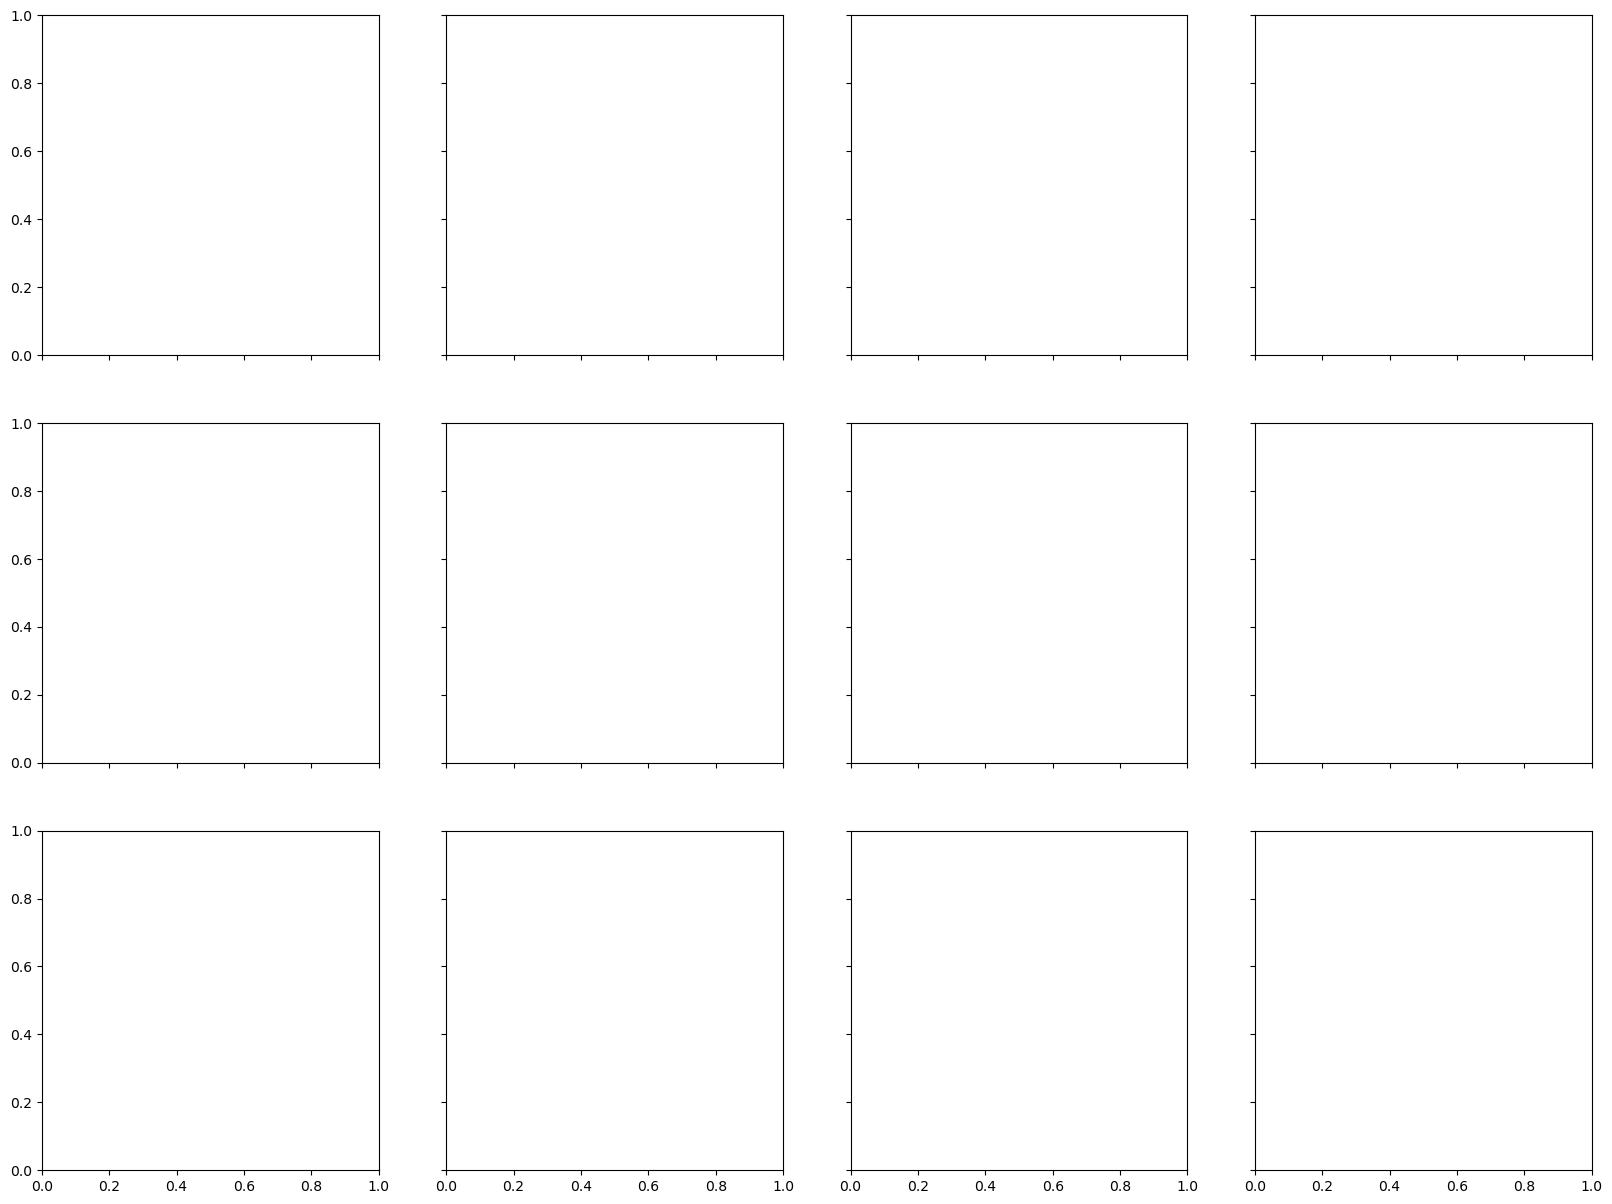

In [ ]:
import geopandas as gpd

import matplotlib.pyplot as plt

import math
import matplotlib.colors as mcolors

# List of times and corresponding temperature columns (assuming 12 times)
times = [f'{hour}_mean' for hour in range(8, 20)]  # From 8 AM to 7 PM
titles = [f"{hour}:00" for hour in range(8, 20)]

# Define a colormap for 5 categories
cmap = mcolors.ListedColormap(['blue', 'green', 'yellow', 'orange', 'red'])
bounds = [0, 20, 30, 35, 40, 50]  # Define temperature bounds for categories
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Calculate the number of rows and columns for the subplots
num_plots = len(times)
cols = 4  # Number of columns
rows = math.ceil(num_plots / cols)  # Calculate rows needed

# Create a figure with dynamic subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, time in enumerate(times):
    # Categorize the temperature into 5 categories based on defined bounds
    gdf['category'] = pd.cut(gdf[time], bins=bounds, labels=False, include_lowest=True)

    # Plot bus stops with assigned categories
    gdf.plot(
        ax=axes[i],
        column='category',  # Use the category column
        cmap=cmap,
        markersize=50,
        legend=True,
        legend_kwds={'shrink': 0.5, 'ticks': bounds, 'label': "Temperature (°C)"},
    )
    axes[i].set_title(f"Bus Stops Temperature Map ({titles[i]})")
    axes[i].set_xlabel("Longitude")
    axes[i].set_ylabel("Latitude")

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


